In [52]:
import numpy as np
import matplotlib.pyplot as pl
import math as mt
import random as rn

# Task A

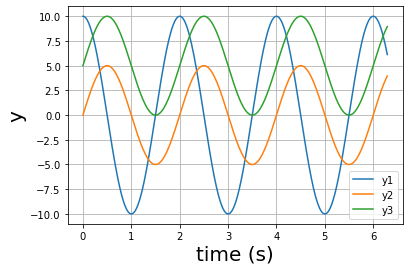

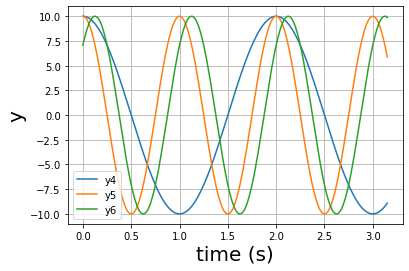

In [53]:
# Task A
# i) ii)
dt = 0.01
# set the time range between 0 and 2pi
t = np.arange(0,2*np.pi+dt,dt)
# various signals
y1 = 10*np.cos(2*np.pi*0.5*t)
y2 = 5*np.cos(2*np.pi*0.5*t-np.pi/2)
y3 = y2 + 5

# plotting section
pl.plot(t,y1,t,y2,t,y3)
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('y',fontsize=20)
pl.legend(['y1','y2','y3'])
pl.show()


# iii) iv)
# set the time range between 0 and pi
t = np.arange(0,np.pi+dt,dt)
# various signals
y4 = 10*np.cos(2*np.pi*0.5*t)
y5 = 10*np.cos(2*np.pi*t)
y6 = 10*np.cos(2*np.pi*t-np.pi/4)

# plotting section
pl.plot(t,y4,t,y5,t,y6)
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('y',fontsize=20)
pl.legend(['y4','y5','y6'])
pl.show()

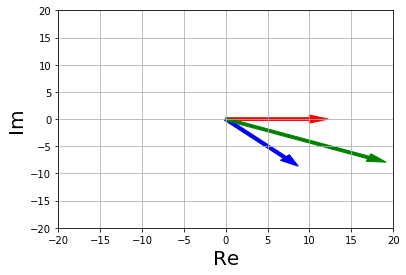

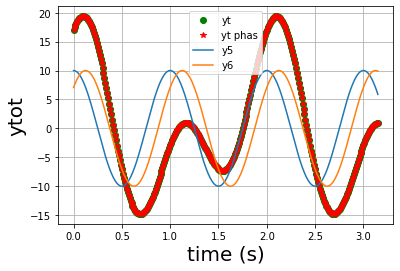

In [112]:
# v) vi)
# various signals represented by phasors
y4p = 10*np.exp(1j*np.pi*t)
y6p = 10*np.exp(1j*(2*np.pi*t-np.pi/4))

# plot at t = 0 in the complex plane
pl.arrow(0,0,y4p[0].real,y4p[0].imag,width=0.5,color='r')
pl.arrow(0,0,y6p[0].real,y6p[0].imag,width=0.5,color='b')
pl.axis([-20,20,-20,20])
pl.xlabel('Re',fontsize=20)
pl.ylabel('Im',fontsize=20)
pl.grid()

# add the two phasors
ytp = y4p + y6p
pl.arrow(0,0,ytp[0].real,ytp[0].imag,width=0.5,color='g')
pl.show()
# add in time
yt = y4 + y6
# determine total y in time from total phasor 
ytd = ytp.real

# plotting section
pl.plot(t,yt,'go')
pl.plot(t,ytd,'r*')
pl.plot(t,y5)
pl.plot(t,y6)
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('ytot',fontsize=20)
pl.legend(['yt','yt phas','y5','y6'])
pl.show()

# Task B

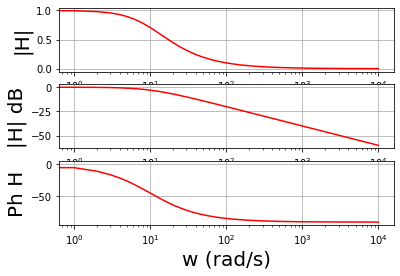

In [4]:
# Task B
# i)
# set the omega range
w = np.arange(0,10000,1)
# evaluate the function H(w)
H = 1 / (1+1j*0.1*w)
# determine amplitued (also in dB) and phase of H(w)
Hamp = abs(H) # amplitude of H
HampdB = 20*np.log10(Hamp) # amplitude of H in dB
Hphase = np.arctan2(H.imag,H.real)*180/np.pi # phase of H, in degree

# plotting section
pl.subplot(3, 1, 1)
pl.semilogx(w,Hamp,'r')
pl.xlabel('w (rad/s)',fontsize=20)
pl.ylabel('|H|',fontsize=20)
pl.grid()
pl.subplot(3, 1, 2)
pl.semilogx(w,HampdB,'r')
pl.xlabel('w (rad/s)',fontsize=20)
pl.ylabel('|H| dB',fontsize=20)
pl.grid()
pl.subplot(3, 1, 3)
pl.semilogx(w,Hphase,'r')
pl.xlabel('w (rad/s)',fontsize=20)
pl.ylabel('Ph H',fontsize=20)
pl.grid()
pl.show()



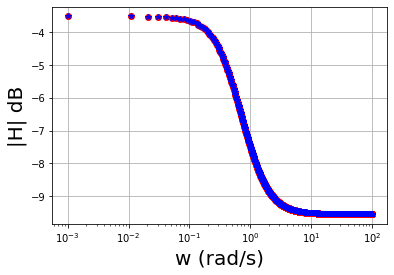

5.0009999999999994 -9.415355039585245


In [65]:
# Task B
# ii) iii)
# values of components
R1 = 1000
R2 = 2000
C1 = 0.001
C2 = 0.002

# set the omega range
w = np.arange(0.001,100,0.01)
# H function
H = 1 / (1 + R1/R2*(1+1j*w*R2*C2)/(1+1j*w*R1*C1))

# evaluate the impedances
Z1 = 1 / (1j*w*C1)
Zh = Z1 * R1 / (Z1 + R1)
Z2 = 1 / (1j*w*C2)
Zv = Z2 * R2 / (Z2 + R2)
# determine H(w)
Hn = Zv / ( Zv + Zh)

# plotting section
pl.semilogx(w,20*np.log10(abs(H)),'ro')
pl.semilogx(w,20*np.log10(abs(Hn)),'b*')
pl.xlabel('w (rad/s)',fontsize=20)
pl.ylabel('|H| dB',fontsize=20)
pl.grid()
pl.show()

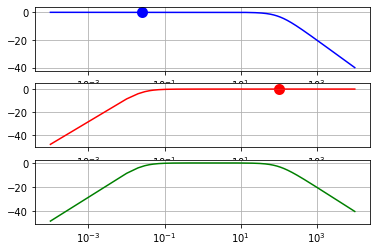

In [49]:
# Task B
# iv)
# values of components
R1 = 2000
C1 = 0.02
R2 = 1000
C2 = 0.00001
# set the omega range
w = np.arange(0.0001,10000,0.01)
# H of pass filter
Hlp = 1 / (1+1j*w*R2*C2)
# H of high pass filter
Hhp = 1j*w*R1*C1 / (1+1j*w*R1*C1)
# cascaded filter
H = Hlp * Hhp


# plotting section
pl.subplot(3, 1, 1)
pl.semilogx(w,20*np.log10(abs(Hlp)),'b')
pl.scatter(1/(R1*C1),0,linewidths=5,color='b')
pl.grid()
pl.subplot(3, 1, 2)
pl.semilogx(w,20*np.log10(abs(Hhp)),'r')
pl.scatter(1/(R2*C2),0,linewidths=5,color='r')
pl.grid()
pl.subplot(3, 1, 3)
pl.semilogx(w,20*np.log10(abs(H)),'g')
pl.grid()

# Task C

In [8]:
# Fourier series for the saw function
def Saw(t,N,T):
    # t: time axis
    # N: number of terms from the series
    # T: period of tthe function
    Nt = len(t)
    L = T/2
    y = np.zeros(Nt)
    for n in range(1,N+1):
        y += 1/n*np.sin(n*np.pi/L*t)
    y = 0.5 - y/np.pi
    return y

In [9]:
# Fourier series for the square function
def Square(t,N,T):
    # t: time axis
    # N: number of terms from the series
    # T: period of the function
    Nt = len(t)
    L = T/2
    y = np.zeros(Nt)
    for n in range(1,N+1,2):
        y += 1/n*np.sin(n*np.pi/L*t)
    y = 4*y/np.pi
    return y

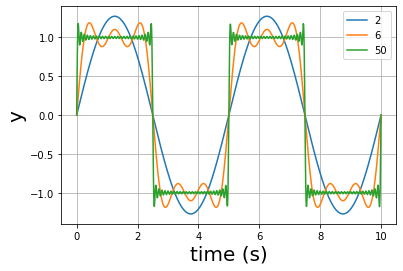

In [71]:
# define the time domain
T = 5
t0 = 0
tend = 2*T
Nt = 1000
# set the time range between 0 and 2T
t = np.linspace(t0,tend,Nt)

# evaluate the series with various number of terms
Nlist = [2,6,50]
for N in Nlist:
    y = Square(t,N,tend/2)
    pl.plot(t,y)

pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('y',fontsize=20)
pl.legend(Nlist)
pl.show()


# Task D

In [12]:
# Discrete Fourier Transform
def DFT(yn):
    # y: values of the function, in time domain
    N = len(yn)
    w = 2*np.pi/N
    FTk = np.zeros(N)
    for k in range(0,N):
        for n in range(0,N):
            FTk[k] += np.exp(-1j*k*w*n)*yn[n]
    return FTk

In [13]:
# Inverse Discrete Fourier Transform
def DFTInv(FTk):
    # ft: values of the FT, in frequency domain
    N = len(FTk)
    w = 2*np.pi/N
    yn = np.zeros(N)
    for n in range(0,N):
        for k in range(0,N):
            yn[n] += np.exp(1j*k*w*n)*FTk[k]
    yn = yn / N
    return yn

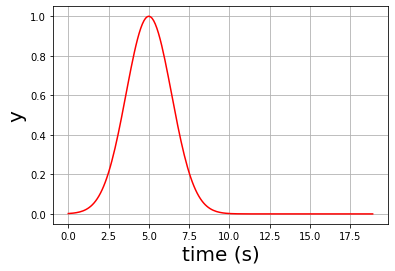

In [73]:
# Task D
# iii)
dt = 0.1
# define the time domain
t0 = 0
tend = 6*np.pi
dt = 0.1
t = np.arange(t0,tend+dt,dt)
N = len(t)  # number of discrete points available
# build the frequency domain axis
df = 1/(N*dt) # frequency step
f = np.arange(0,1/dt,df)

# set the discrete function y(t)
yn = np.sin(t) #+ np.sin(3*t) + np.sin(6*t)
yn = np.exp(-(t-5)**2/4)

# plotting section
pl.plot(t,yn,color='r')
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('y',fontsize=20)
pl.show()

/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


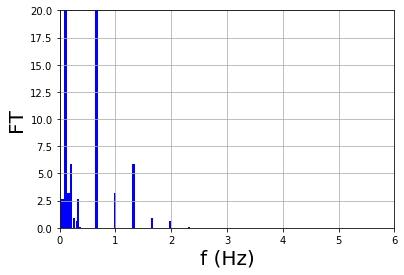

0.3684210526315789 0.08791937526572574
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.         1.05263158 1.10526316 1.15789474 1.21052632
 1.26315789 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579
 1.57894737 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526
 1.89473684 1.94736842 2.         2.05263158 2.10526316 2.15789474
 2.21052632 2.26315789 2.31578947 2.36842105 2.42105263 2.47368421
 2.52631579 2.57894737 2.63157895 2.68421053 2.73684211 2.78947368
 2.84210526 2.89473684 2.94736842 3.         3.05263158 3.10526316
 3.15789474 3.21052632 3.26315789 3.31578947 3.36842105 3.42105263
 3.47368421 3.52631579 3.57894737 3.63157895 3.68421053 3.73684211
 3.78947368 3.84210526 3.89473684 3.94736842 4.         4.05263158
 4.10526316 4.15789474 4.21052632 4.26315789 4.31578947 4.36842105
 4.42105263 4.47368421 

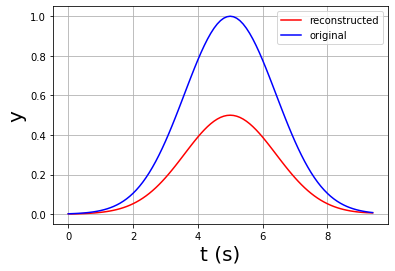

In [86]:
# iii)
# determine the FT of y
FTk = DFT(yn)
# plot first half of FT (amplitude)
# for sine waves, since we are in omega domain, we multiply by 2pi
pl.bar(f[:int(N/2)]*2*np.pi,abs(FTk[:int(N/2)]),width=0.04,color='b')
# otherwise, we stay in frequency
pl.bar(f[:int(N/2)],abs(FTk[:int(N/2)]),width=0.04,color='b')
pl.axis([0,6,0,20])
pl.grid()
pl.xlabel('f (Hz)',fontsize=20)
pl.ylabel('FT',fontsize=20)
pl.show()
print(f[7],abs(FTk[7]))
print(f)
# reconstruct the function from the spectrum  via Inverse DFT
ynt = DFTInv(FTk)
pl.plot(t[:int(N/2)],abs(ynt[:int(N/2)]),color='r')
pl.plot(t[:int(N/2)],abs(yn[:int(N/2)]),color='b')
pl.grid()
pl.xlabel('t (s)',fontsize=20)
pl.ylabel('y',fontsize=20)
pl.legend(['reconstructed','original'])
pl.show()

# Task E

/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


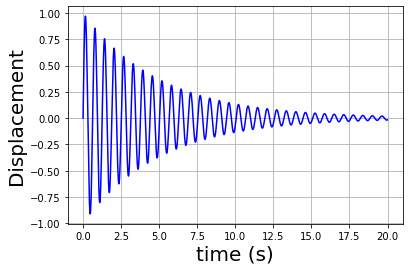

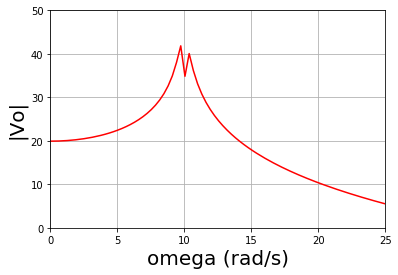

In [42]:
# i) vibrating beam
# read the data
f = open('Vibration.txt','r')
temp = f.readlines()
yn = []
for v in temp:
    yn += [float(v.rstrip())]
yn = np.array(yn)

# set the time axis
dt = 0.01
N = len(yn)  # number of discrete points available
t0 = 0
tend = (N-1) * dt
t = np.arange(t0,tend,dt)
# build the frequency axis
df = 1/(N*dt) # frequency step
f = np.arange(0,1/dt,df)

# DFT
FTk = DFT(yn)

# plotting section
pl.plot(t,yn,'b')
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('Displacement',fontsize=20)
pl.grid()
pl.show()
# spectrum
pl.plot(f[:int(N/2)]*2*np.pi,20*np.log10(abs(FTk[:int(N/2)])),color='r')
pl.grid()
pl.axis([0,f[int(N/2)]/2,0,50])
pl.xlabel('omega (rad/s)',fontsize=20)
pl.ylabel('|Vo|',fontsize=20)
pl.show()


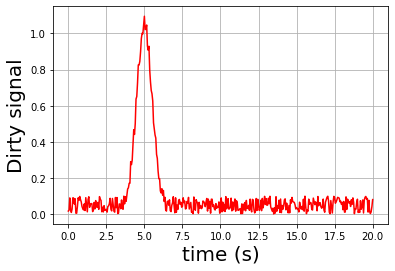

3.0


In [95]:
# Noisy signal
# read the data
f = open('Noisy.txt','r')
temp = f.readlines()
yn = []
for v in temp:
    yn += [float(v.rstrip())]
yn = np.array(yn)


# set the time axis
dt = 0.05
N = len(yn)  # number of discrete points available
t0 = 0
tend = (N-1) * dt
t = np.arange(t0,tend+dt,dt)
# build the frequency axis
df = 1/(N*dt) # frequency step
f = np.arange(0,1/dt,df)

# plotting section
pl.plot(t,yn,color='r')
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('Dirty signal',fontsize=20)
pl.show()


/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


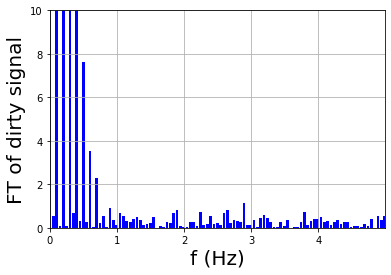

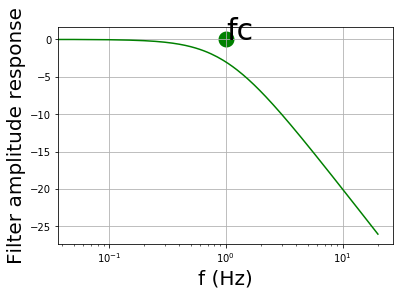

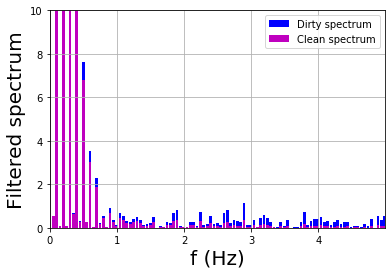

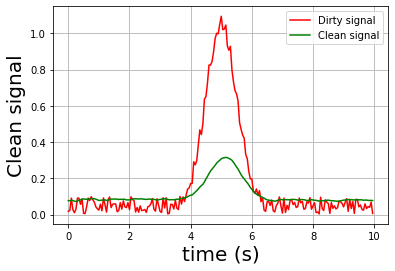

4.0 0.10636571485200542


In [98]:
# observe the spectrum of the noisy signal
FTk = DFT(yn)
pl.bar(f[:int(N/2)],abs(FTk[:int(N/2)]),width=0.04,color='b')
pl.axis([0,f[int(N/2)]/2,0,10])
pl.grid()
pl.xlabel('f (Hz)',fontsize=20)
pl.ylabel('FT of noisy signal',fontsize=20)
pl.show()

# set the transfer function of a low pass filter
fc = 1 # corner frequency
# transfer function of LP
H = 1 / (1+1j*f/fc)
# Bode plot of H
Hamp = 20*np.log10(H)
pl.semilogx(f,Hamp,color='g')
pl.scatter(fc,0,linewidths=10,color='g')
pl.text(fc,0,'fc',fontsize=30)
pl.grid()
pl.xlabel('f (Hz)',fontsize=20)
pl.ylabel('Filter amplitude response',fontsize=20)
pl.show()

# pass the spectrum of the dirty signal through the filter
Vof = H[:-1] * FTk
# plot the clean spectrum
pl.bar(f[:int(N/2)],abs(FTk[:int(N/2)]),width=0.04,color='b')
pl.bar(f[:int(N/2)],abs(Vof[:int(N/2)]),width=0.04,color='m')
pl.axis([0,f[int(N/2)]/2,0,10])
pl.grid()
pl.xlabel('f (Hz)',fontsize=20)
pl.ylabel('Filtered spectrum',fontsize=20)
pl.legend(['Dirty spectrum','Clean spectrum'])
pl.show()

# rebuild the time domain clean signal
Von = DFTInv(Vof)
# plot the clean function in time
pl.plot(t[:int(N/2)],abs(yn[:int(N/2)]),color='r')
pl.plot(t[:int(N/2)],abs(Von[:int(N/2)]),color='g')
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('Clean signal',fontsize=20)
pl.legend(['Dirty signal','Clean signal'])
pl.show()
